In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [74]:
df=pd.read_csv(r"C:\Users\Vinayak\Desktop\Non-Tech\py project2\Python_youtube_Analysis\video_id_info.csv", on_bad_lines='skip')

In [75]:
df.head()


,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [76]:
df.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [77]:
df.dropna(inplace=True)

In [78]:
df.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [79]:
df.shape

(691374, 4)

In [80]:
from textblob import TextBlob

In [81]:
df_sample=df[0:1000]

In [82]:
TextBlob(df_sample['comment_text'][0])

TextBlob("Logan Paul it's yo big day ‼️‼️‼️")

In [83]:
TextBlob(df_sample['comment_text'][0]).sentiment

Sentiment(polarity=0.0, subjectivity=0.1)

In [84]:
TextBlob(df_sample['comment_text'][0]).sentiment.polarity

0.0

In [85]:
#performing sentiment analysis on the comments 

polarity=[]

#using try and except block to handle the error that might occur while performing sentiment analysis on the comments wherein the comments might be empty or might not be in the correct format


for comment in df['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)
    


In [86]:
len(polarity)

691374

In [87]:
df['polarity']=polarity


In [88]:
df.head()

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


3. WordCloud Analysis of data


In [89]:
# %pip install wordcloud
from wordcloud import WordCloud, STOPWORDS


In [90]:
filter1=df['polarity']==1
filter2=df['polarity']==-1
filter3=df['polarity']==0

positive_comments=df[filter1]
negative_comments=df[filter2]
neutral_comments=df[filter3]



In [91]:
set(STOPWORDS) #stopwords are the words that are not useful in the analysis and can be removed like 'the', 'is', 'are' etc.

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [92]:
# df['comment_text']
positive_comments.shape



(19390, 5)

In [93]:
negative_comments.shape

(3508, 5)

In [94]:
neutral_comments.shape

(284424, 5)

In [95]:
total_positive_comments=' '.join(positive_comments['comment_text'])



#creating a string for the positive comments
total_negative_comments=' '.join(negative_comments['comment_text'])
#creating a string for the negative comments

In [96]:
# total_positive_comments
wordcloud1=WordCloud(stopwords=set(STOPWORDS), background_color='black').generate(total_positive_comments)

(-0.5, 399.5, 199.5, -0.5)

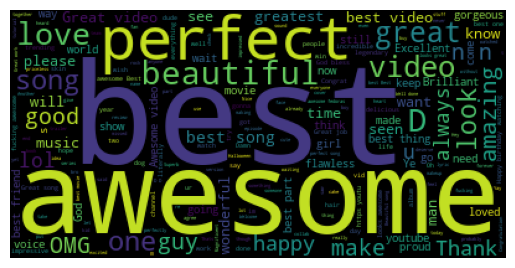

In [97]:
plt.imshow(wordcloud1)
plt.axis('off')

Conclusion: Most of the positive comments contained words like 'awesome', 'best', etc. and there 19k positive comments out of 700k comments.

In [98]:
wordcloud2=WordCloud(stopwords=set(STOPWORDS), background_color='black').generate(total_negative_comments)

(-0.5, 399.5, 199.5, -0.5)

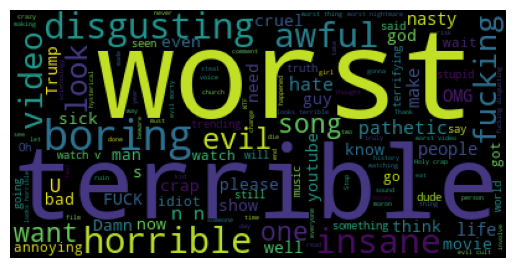

In [99]:
plt.imshow(wordcloud2)
plt.axis('off')

Conclusion: Most of the negative comments contained words like 'worst', 'terrible', etc. and there 3.5k positive comments out of 700k comments.

In [100]:
wordcloud3=WordCloud(stopwords=set(STOPWORDS), background_color='black').generate(' '.join(neutral_comments['comment_text']))

(-0.5, 399.5, 199.5, -0.5)

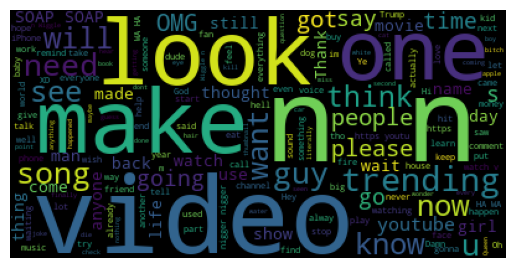

In [101]:
plt.imshow(wordcloud3)
plt.axis('off')

Conclusion: There is no observable pattern in neutral which can help our analysis

In [102]:
%pip install emoji==2.10.1

In [103]:
import emoji

In [104]:
comment="Usme se merko yaad nhi konsi use ki thi download krte time 😭😭😭😭👍"

In [105]:
[char for char in comment if char in emoji.EMOJI_DATA] 

# This syntax is a list comprehension in Python. It allows you to create a new list by iterating over an existing iterable (in this case, the comment variable) and applying a condition (in this case, checking if each character is present in the emoji.EMOJI_DATA).

# Let's break down the syntax step by step:

# [char for char in comment]: This is the basic structure of a list comprehension. It starts with square brackets [], which indicate that we are creating a new list. Inside the brackets, we have an expression char, followed by a for loop that iterates over each character char in the comment variable. This part simply creates a new list with all the characters from the comment variable.

# if char in emoji.EMOJI_DATA: This is an optional part of the list comprehension that adds a condition. It checks if each character char is present in the emoji.EMOJI_DATA. If the condition is true, the character is included in the new list. If the condition is false, the character is skipped.

# So, the overall purpose of this code is to create a new list that contains only the characters from the comment variable that are present in the emoji.EMOJI_DATA.

['😭', '😭', '😭', '😭', '👍']

In [106]:
all_emoji=[]

for comment in df['comment_text']:
    for char in comment:
        if char in emoji.EMOJI_DATA:
            all_emoji.append(char)

In [107]:
from collections import Counter


In [108]:
Counter(all_emoji).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [109]:
Counter(all_emoji).most_common(10)[0]

('😂', 36987)

In [110]:
freq=[Counter(all_emoji).most_common(10)[i][1] for i in range(10)]
freq

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [111]:
emoji=[Counter(all_emoji).most_common(10)[i][0] for i in range(10)]
emoji

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [112]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [113]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

# Initialize notebook mode
init_notebook_mode(connected=True)






In [114]:
trace=go.Bar(x=emoji, y=freq)

iplot([trace])

In [115]:
import os

In [116]:
files=os.listdir(r"C:\Users\Vinayak\Desktop\Non-Tech\py project2\Python_youtube_Analysis\YT_additional_data")

In [117]:
files_csv=[file for file in files if '.csv' in file]

files_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'sample_data.csv',
 'USvideos.csv']

In [118]:
import warnings 
warnings.filterwarnings('ignore')


In [119]:
#now make a larger dataframe by concatenating all the csv files

full_df=pd.DataFrame()
path=r"C:\Users\Vinayak\Desktop\Non-Tech\py project2\Python_youtube_Analysis\YT_additional_data"
for file in files_csv:
    curr_df = pd.read_csv(path+ '/'+file, encoding='iso-8859-1')
    full_df = pd.concat([full_df, curr_df], ignore_index=True)
    #concatenating the dataframes and ignoring the index
    #ignore_index=True will create a new index for the concatenated dataframe 
    #if we don't use ignore_index=True, the index of the original dataframes will be retained in the concatenated dataframe 
    #which will lead to duplicate index values and incorrect indexing of the rows in the concatenated dataframe
    #so it is always a good practice to use ignore_index=True while concatenating dataframes

  

In [120]:
full_df.shape

(376042, 16)

In [121]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...


In [122]:
full_df.duplicated().sum() #checking for duplicate values in the dataframe

36453

In [123]:
full_df.drop_duplicates(inplace=True) #dropping the duplicate values

In [124]:
full_df.duplicated().sum()

0

In [125]:
full_df[0:100].to_csv(r"C:\Users\Vinayak\Desktop\Non-Tech\py project2\Python_youtube_Analysis\YT_additional_data\sample_data.csv", index=False)

In [126]:
full_df[0:1000].to_json(r"C:\Users\Vinayak\Desktop\Non-Tech\py project2\Python_youtube_Analysis\YT_additional_data\sample_data.json")

7. Maximum Likes

In [127]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...


In [128]:
full_df['category_id'].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44], dtype=int64)

In [129]:
#read json
json_df=pd.read_json(r"C:\Users\Vinayak\Desktop\Non-Tech\py project2\Python_youtube_Analysis\YT_additional_data\US_category_id.json")

In [130]:
json_df

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
5,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
6,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
7,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
8,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
9,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [131]:
json_df['items'][0] #accessing the first row 

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [132]:
cat_dict={}


for item in json_df['items']:
    cat_dict[item['id']]=item['snippet']['title']
cat_dict

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '29': 'Nonprofits & Activism',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [133]:
# Convert 'category_id' to integers if they are strings
full_df['category_id'] = full_df['category_id'].astype(str)

# Alternatively, if keys in cat_dict are strings, convert 'category_id' to strings
# full_df['category_id'] = full_df['category_id'].astype(str)

full_df['category_id']

0         10
1         23
2         23
3         24
4         10
          ..
376036    22
376038    22
376039    24
376040     1
376041    20
Name: category_id, Length: 339589, dtype: object

In [134]:

 #mapping the category_id to the category_name(new column)
full_df['category_name']=full_df['category_id'].map(cat_dict)

In [135]:
full_df['category_name']

0                    Music
1                   Comedy
2                   Comedy
3            Entertainment
4                    Music
                ...       
376036      People & Blogs
376038      People & Blogs
376039       Entertainment
376040    Film & Animation
376041              Gaming
Name: category_name, Length: 339589, dtype: object

In [136]:
full_df.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music


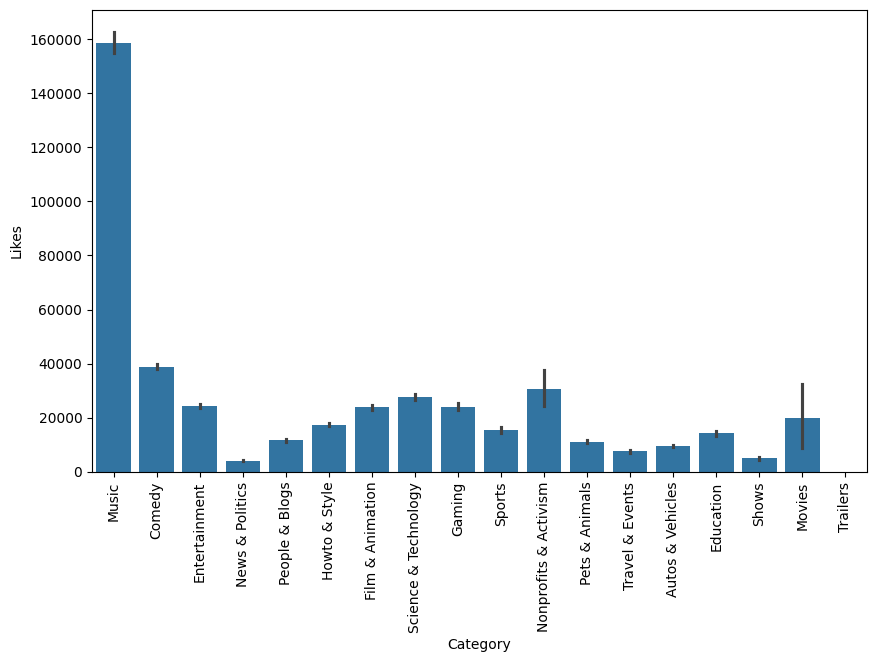

In [137]:
plt.figure(figsize=(10,6))
sns.barplot(x='category_name', y='likes' , data=full_df)
plt.xlabel('Category')
plt.ylabel('Likes')
plt.xticks(rotation=90)
plt.show()


Analysis of relation between views and likes


In [138]:
(full_df['likes']/full_df['views'])*100

0          4.589104
1         12.594873
2          4.575843
3          6.309630
4          4.874563
            ...    
376036     7.820293
376038     5.635623
376039     4.507286
376040     3.408645
376041     3.464728
Length: 339589, dtype: float64

In [139]:
full_df['likes_percentage']=(full_df['likes']/full_df['views'])*100
full_df['dislikes_percentage']=(full_df['dislikes']/full_df['views'])*100
full_df['comment_percentage']=(full_df['comment_count']/full_df['views'])*100
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,likes_percentage,dislikes_percentage,comment_percentage
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music,4.589104,0.253051,0.733639
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy,12.594873,0.166363,1.284185
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy,4.575843,0.167292,0.256342
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,6.309630,0.094903,0.835851
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music,4.874563,0.062887,0.253752


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Music'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Entertainment'),
  Text(3, 0, 'News & Politics'),
  Text(4, 0, 'People & Blogs'),
  Text(5, 0, 'Howto & Style'),
  Text(6, 0, 'Film & Animation'),
  Text(7, 0, 'Science & Technology'),
  Text(8, 0, 'Gaming'),
  Text(9, 0, 'Sports'),
  Text(10, 0, 'Nonprofits & Activism'),
  Text(11, 0, 'Pets & Animals'),
  Text(12, 0, 'Travel & Events'),
  Text(13, 0, 'Autos & Vehicles'),
  Text(14, 0, 'Education'),
  Text(15, 0, 'Shows'),
  Text(16, 0, 'Movies'),
  Text(17, 0, 'Trailers')])

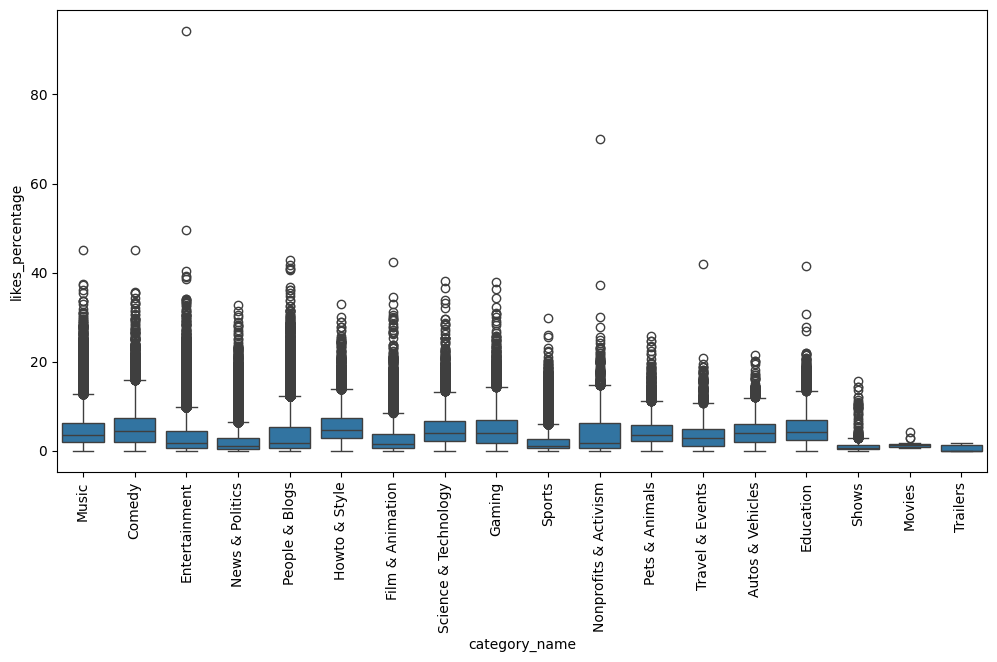

In [140]:
plt.figure(figsize=(12,6))
sns.boxplot(x='category_name', y='likes_percentage', data=full_df)
plt.xticks(rotation=90)


Relation between views and likes


<Axes: xlabel='views', ylabel='likes'>

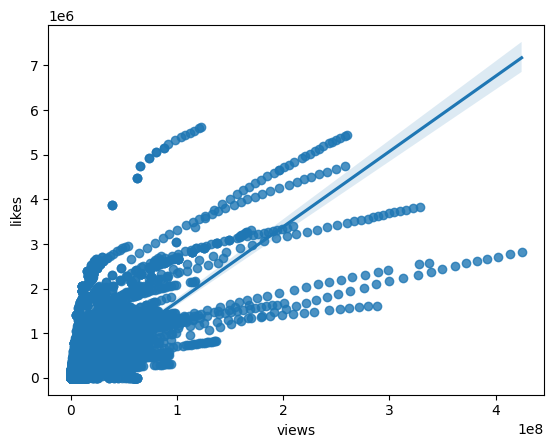

In [141]:
sns.regplot(x='views', y='likes', data=full_df)


In [142]:
full_df[['views', 'likes', 'dislikes']].corr()

,views,likes,dislikes
views,1.000000,0.779517,0.405413
likes,0.779517,1.000000,0.451754
dislikes,0.405413,0.451754,1.000000


<Axes: >

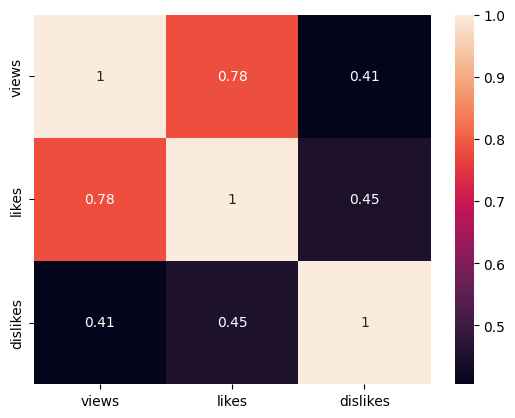

In [143]:
sns.heatmap(full_df[['views', 'likes', 'dislikes']].corr(), annot=True)

In [144]:
full_df['channel_title'].value_counts()
# unique() returns an array of unique values.
# value_counts() returns a Series object with the count of each unique value.

channel_title
The Late Show with Stephen Colbert         710
WWE                                        643
Late Night with Seth Meyers                592
TheEllenShow                               555
Jimmy Kimmel Live                          528
                                          ... 
NightcoreZodiac                              1
Leyendas & Videojuegos                       1
Heiji                                        1
Jeffrey Grubb                                1
ç¥æ§ãåã¯æ°ã¥ãã¦ãã¾ã£ã      1
Name: count, Length: 37834, dtype: int64

In [145]:
cdf=full_df['channel_title'].value_counts().reset_index(name='total_videos')

# cdf=full_df.groupby(['channel_title']).size().sort_values(ascending=False).reset_index(name='total_videos')


In [146]:
cdf

,channel_title,total_videos
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37829,NightcoreZodiac,1
37830,Leyendas & Videojuegos,1
37831,Heiji,1
37832,Jeffrey Grubb,1


In [81]:
import plotly.express as px
import plotly.io as pio 

In [84]:
fig=px.bar(data_frame=cdf[0:20], x='channel_title', y= 'total_videos', title='Top 20 channels with most videos')
fig.show()
pio.write_html(fig, file='top_20_channels.html', auto_open=True)
